# Travel Product Ideas

In this notebook, we run market research simulations for which we have (or believe to have :-) the correct answers.

In [ ]:
from tinytroupe.agent import TinyPerson
from tinytroupe.environment import TinyWorld

from tinytroupe.experimentation import InPlaceExperimentRunner

# specific utilities for the usecase
from market_research_utils import *

## Experiment setup

In [ ]:
experiment_runner = InPlaceExperimentRunner("./spicy_product_market_research.json")  

experiment_runner.add_experiment("Control")
experiment_runner.add_experiment("Treatment")

2025-03-24 21:12:50,445 - tinytroupe - WARNING - Configuration file './spicy_product_market_research.json' exists and was loaded successfully. If you are trying to fully rerun the experiments, delete it first.


In [3]:

# this is meant to prime the agent to start thinking about what he/she would like to do on vacation
interviewer_introduction =\
    """
    We are performing some market research and need to know you more. 
    Can you please:
      - present yourself?
      - list your top-10 interests?
      - tell us what are your favorite food styles and why.
    """

interviewer_main_question =\
    """ 
    We are researching food preferences for a new product to be sold in supermarkets.   
    The question is: do you like spicy food? You **must** respond with "Yes" or "No" **only**, 
    and explain why. If you are not sure, please pick the answer that you think is most likely. 

    Please be honest, we are not here to judge you, but just to learn from you. 
     
    Now please answer the question." \
    """

Now let's enclose the audience in an environment, to make it easier to interact with. Note that we set `broadcast_if_no_target` to `False`, which instructs the environment to **do not** broadcast what specific agents say to the others (unless the agent deliberately specify the target). We are not simulating a focus group, so we don't want discussions.


In [4]:
norwegians = TinyPerson.load_specifications_from_folder("./population/norway_general/")
mexicans = TinyPerson.load_specifications_from_folder("./population/mexico_general/")

In [5]:
norway_market = TinyWorld(f"Target audience 1 (Norway)", norwegians, broadcast_if_no_target=False)
mexico_market = TinyWorld(f"Target audience 2 (Mexico)", mexicans, broadcast_if_no_target=False)

## Perform the research

Now we actually ask agents about their opinion. Note that we are asking for specific answers (Yes, No, Maybe), both to convey the granularity of preference we seek, and to make it easier to extract the results later. In general, a coarser granuarity is likely to have higher quality, since it requires less information to be computed accurately.

In [6]:
norway_market.broadcast(interviewer_introduction)
mexico_market.broadcast(interviewer_introduction)

norway_market.broadcast(interviewer_main_question)
mexico_market.broadcast(interviewer_main_question)

USER --> Astrid Johansen: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what are your favorite food styles and why.

       + --> Astrid Nilsen

       + --> Astrid Sørensen

       + --> ...others...

USER --> Ana Maria Herrera: [CONVERSATION] 
          >      We are performing some market research and need to know you more.      Can you
          > please:       - present yourself?       - list your top-10 interests?       - tell us
          > what are your favorite food styles and why.

       + --> Ana Maria Salazar

       + --> Camila Rojas

       + --> ...others...

USER --> Astrid Johansen: [CONVERSATION] 
          >       We are researching food preferences for a new product to be sold in supermarkets.
          > The question is: do you like spicy food? You **must** respond with "Yes" or "No"
          > **only**,      and explain why. If you are not sure, please pick the answer that you
          > think is most likely.       Please be honest, we are not here to judge you, but just to
          > learn from you.            Now please answer the question."

       + --> Astrid Nilsen

       + --> Astrid Sørensen

       + --> ...others...

USER --> Ana Maria Herrera: [CONVERSATION] 
          >       We are researching food preferences for a new product to be sold in supermarkets.
          > The question is: do you like spicy food? You **must** respond with "Yes" or "No"
          > **only**,      and explain why. If you are not sure, please pick the answer that you
          > think is most likely.       Please be honest, we are not here to judge you, but just to
          > learn from you.            Now please answer the question."

       + --> Ana Maria Salazar

       + --> Camila Rojas

       + --> ...others...

In [8]:
norway_market.run(1)

───────────────────────────────────── Target audience 1 (Norway) step 1 of 1 ──────────────────────────────────────

Astrid Sørensen acts: [TALK] 
                     > Hello! I'm Astrid Sørensen, a 30-year-old from Oslo, Norway. I have a passion
                     > for cooking and baking, and I'm currently looking for opportunities that
                     > align with my interests. My top-10 interests include: 1. Cooking and baking
                     > 2. Exploring new cuisines 3. Gardening 4. Volunteering at local shelters 5.
                     > Participating in community cooking classes 6. Spending time with friends over
                     > meals 7. Reading about food history 8. Traveling to learn about traditional
                     > cooking techniques 9. Experimenting with new recipes 10. Attending food
                     > festivals.  As for my favorite food styles, I love traditional Asian pastries
                     > because they are often intricate and flavorful, and I appreciate the cultural
                     > significance behind them. I also enjoy Mediterranean cuisine for its fresh
                     > ingredients and vibrant flavors. Both styles allow me to express my
                     > creativity in the kitchen!

Freja Eriksen acts: [TALK] 
                   > Hello, I'm Freja Eriksen, a 55-year-old from Aarhus, Denmark. I have a
                   > background in management and administration, and I'm currently seeking new job
                   > opportunities after being laid off. I enjoy deep conversations and have a
                   > strong sense of empathy. My interests include reading historical fiction and
                   > biographies, gardening, volunteering for local charities, and cooking
                   > traditional Middle Eastern dishes.   As for my favorite food styles, I
                   > particularly enjoy Middle Eastern cuisine because it connects me to my heritage
                   > and allows me to share my family's history through cooking. I also appreciate
                   > the flavors and the communal aspect of sharing meals with others.   Regarding
                   > spicy food, I would say "No". I prefer milder flavors as they are more
                   > comforting to me, and I find that I enjoy the subtleties of taste rather than
                   > intense heat. I appreciate the balance of flavors in dishes without
                   > overwhelming spiciness.

Emil Bergstrom acts: [TALK] 
                    > Hello! I'm Emil Bergstrom, a high school teacher from Oslo, Norway. I
                    > specialize in social studies and love creating engaging lessons for my
                    > students. My top-10 interests include: 1. Hiking and exploring Norway's
                    > national parks. 2. Reading educational literature and psychology books. 3.
                    > Participating in community service and volunteer work. 4. Spending time with
                    > family and friends. 5. Cooking traditional Norwegian dishes. 6. Listening to
                    > folk music and attending local concerts. 7. Engaging in meaningful
                    > conversations. 8. Learning about different cultures and perspectives. 9.
                    > Practicing mindfulness and outdoor activities. 10. Advocating for mental
                    > health resources in education.  As for my favorite food styles, I enjoy
                    > traditional Norwegian cuisine because it reminds me of my childhood and the
                    > connection to nature. I appreciate fresh, local ingredients and the simplicity
                    > of the dishes. They often bring a sense of comfort and nostalgia for me.

Henrik Berg acts: [TALK] 
                 > Hello! My name is Henrik Berg, and I'm a 30-year-old Norwegian currently living
                 > in Oslo. I have a background in culinary arts and a passion for cooking and
                 > baking. I enjoy exploring different cuisines and sharing meals with friends and
                 > family.   As for my top-10 interests, they include: 1. Cooking and baking 2.
                 > Exploring new cuisines 3. Gardening 4. Reading novels 5. Volunteering in
                 > community kitchens 6. Learning about food history 7. Attending cooking classes 8.
                 > Visiting local markets 9. Experimenting with recipes 10. Spending time with my
                 > children in the kitchen.  Regarding my favorite food styles, I particularly love
                 > traditional Asian dishes because they often incorporate fresh ingredients and
                 > bold flavors. I appreciate the cultural significance behind these dishes and
                 > enjoy the creativity involved in preparing them.   Now, to answer your question
                 > about spicy food: Yes, I do like spicy food! I find that it adds an exciting kick
                 > to dishes and enhances the overall flavor. It also reminds me of the diverse cu
                 > (...)

Ingrid Lund acts: [TALK] 
                 > Hello! I'm Ingrid Lund, a 45-year-old financial consultant from Sweden. I run my
                 > own consultancy, helping small businesses with their financial planning and
                 > budgeting. I enjoy the flexibility of being self-employed, although it can be
                 > challenging at times.   As for my interests, here are my top 10: 1. Traveling to
                 > new countries and experiencing different cultures. 2. Reading financial
                 > literature and self-help books. 3. Gardening and spending time outdoors. 4.
                 > Cooking traditional Swedish dishes. 5. Attending local community events and
                 > markets. 6. Volunteering at local charities. 7. Learning about sustainable
                 > business practices. 8. Spending quiet evenings with a good book. 9. Exploring
                 > nature reserves and hiking. 10. Hosting game nights with friends.  Regarding food
                 > styles, I love traditional Swedish cuisine because it reminds me of my childhood
                 > and brings a sense of comfort. I also enjoy experimenting with different
                 > international dishes, as it allows me to explore new flavors and cooking
                 > techniques.   I hope t (...)

Henrik Eriksen acts: [TALK] 
                    > Hello! I'm Henrik Eriksen, a high school teacher from Norway. I specialize in
                    > social studies and love creating engaging lessons for my students. My top-10
                    > interests include: 1. Hiking and exploring Norway's national parks. 2. Reading
                    > educational literature and psychology books. 3. Participating in community
                    > service and volunteer work. 4. Cooking traditional Norwegian dishes. 5.
                    > Listening to folk music and attending local concerts. 6. Engaging in
                    > meaningful conversations. 7. Spending time with family and friends outdoors.
                    > 8. Learning about different cultures through travel. 9. Practicing mindfulness
                    > and meditation. 10. Advocating for mental health awareness in education.  As
                    > for my favorite food styles, I enjoy traditional Norwegian cuisine because it
                    > connects me to my roots and the natural ingredients reflect the beauty of my
                    > country. I also appreciate Mediterranean food for its fresh flavors and
                    > healthy options.   Regarding spicy food, I would say "No". I prefer milder
                    > flavors as they align more with my tast (...)

Astrid Johansen acts: [TALK] 
                     > Hello! I'm Astrid Johansen, a 25-year-old nurse from Norway. I work at Oslo
                     > University Hospital in the emergency department, where I provide immediate
                     > care to patients and collaborate with doctors. I'm passionate about patient
                     > advocacy and strive to provide compassionate care.   As for my interests,
                     > here are my top 10: 1. Traveling to new countries and experiencing different
                     > cultures. 2. Volunteering for local charities focused on health and wellness.
                     > 3. Cooking and trying out new recipes, especially healthy meals. 4. Nature
                     > walks and hiking in the Norwegian fjords. 5. Reading fiction, particularly
                     > contemporary novels. 6. Spending time with friends and family, especially
                     > during holidays. 7. Learning about mental health care and improving services.
                     > 8. Engaging in community health initiatives. 9. Exploring local hiking
                     > trails. 10. Journaling to reflect on my experiences and emotions.  Regarding
                     > food styles, I enjoy healthy and balanced meals, particularly Mediterranean
                     > and Asian cuisines. I appreciate these sty (...)

Emil Knudsen acts: [TALK] 
                  > Hello! I'm Emil Knudsen, a 28-year-old from Norway. Currently, I'm unemployed
                  > and actively seeking new job opportunities. I have a background in service and
                  > retail management, and I enjoy cooking and baking in my free time. My top
                  > interests include: 1. Cooking and baking 2. Exploring new recipes 3. Watching
                  > cooking shows 4. Gardening 5. Reading fiction 6. Spending time in nature 7.
                  > Trying out new comfort food 8. Visiting local markets 9. Spending time with my
                  > cat, Miso 10. Connecting with friends over coffee.  As for my favorite food
                  > styles, I love comfort food, especially baked goods, because they remind me of
                  > home and bring a sense of warmth and happiness. I also enjoy experimenting with
                  > different flavors and ingredients in my cooking.   Regarding spicy food, I would
                  > say "No". I tend to prefer milder flavors because I find spicy food overwhelming
                  > and it can sometimes upset my stomach. I enjoy the taste of food without the
                  > heat, as it allows me to appreciate the flavors more fully.

Astrid Nilsen acts: [TALK] 
                   > Hi! I'm Astrid Nilsen, a 22-year-old aspiring artist from Oslo, Norway. I'm
                   > passionate about music and often perform at local open mic nights. I love
                   > collaborating with other artists and exploring different creative avenues.   As
                   > for my top-10 interests, they include: 1. Music, especially indie and folk
                   > genres. 2. Attending cultural events like art exhibitions and local festivals.
                   > 3. Exploring nature for inspiration. 4. Writing lyrics and poetry. 5. Playing
                   > the guitar. 6. Spending time with friends at cozy cafes. 7. Listening to vinyl
                   > records. 8. Volunteering at local shelters. 9. Engaging in online communities
                   > related to art. 10. Traveling to experience different cultures and music
                   > scenes.  Regarding food, I enjoy a variety of styles, but I particularly love
                   > comfort food like pasta and pizza because they remind me of home and are often
                   > associated with gatherings with friends and family. I also appreciate fresh,
                   > healthy options like salads and seafood, as they make me feel good and
                   > energized.   I hope this he (...)

Ingrid Knudsen acts: [TALK] 
                    > Hello! My name is Ingrid Knudsen, and I am a 60-year-old social worker living
                    > in Oslo, Norway. I specialize in healthcare and social services for the
                    > elderly, and I am passionate about improving their quality of life. I enjoy
                    > engaging in meaningful conversations and sharing stories with others.   As for
                    > my top-10 interests, they include: 1. Volunteering at local charities 2.
                    > Gardening and spending time outdoors 3. Reading books on psychology and self-
                    > improvement 4. Watching sports, especially football and skiing 5. Cooking
                    > traditional Norwegian dishes 6. Spending time with family and friends 7.
                    > Listening to classical music and jazz 8. Participating in community events 9.
                    > Traveling and exploring different cultures 10. Engaging in discussions about
                    > healthcare policies.  Regarding my favorite food styles, I particularly enjoy
                    > traditional Norwegian cuisine because it reminds me of my childhood and the
                    > values my parents instilled in me about community and sharing meals with loved
                    > ones. I also appreciate healthy an (...)

Ingrid Madsen acts: [TALK] 
                   > Hello! I'm Ingrid Madsen, a high school teacher specializing in social studies
                   > and environmental science. I love engaging with my students and encouraging
                   > them to think critically about the world around them.   As for my top-10
                   > interests, they include: 1. Outdoor activities like hiking and kayaking. 2.
                   > Reading educational literature and environmental science. 3. Volunteering for
                   > community service projects. 4. Traveling to explore different cultures and
                   > landscapes. 5. Engaging in discussions about social issues. 6. Cooking healthy
                   > meals and trying new recipes. 7. Attending music festivals and cultural events.
                   > 8. Photography, especially capturing nature and outdoor adventures. 9.
                   > Participating in local environmental clean-up events. 10. Blogging about
                   > educational practices and outdoor learning.  Regarding my favorite food styles,
                   > I enjoy healthy cooking, particularly Mediterranean and Asian cuisines. I
                   > appreciate these styles because they often emphasize fresh ingredients, vibrant
                   > flavors, and a variety of vege (...)

Freja Johansen acts: [TALK] 
                    > Hello, I'm Freja Johansen, a software engineer with a passion for technology
                    > and problem-solving. I work at Tech Innovations A/S, where I focus on
                    > developing software solutions. My top interests include technology and
                    > software development, sports like soccer and cycling, reading science fiction
                    > and tech blogs, participating in hackathons, and engaging in discussions about
                    > technology trends. I also enjoy outdoor activities and quiet evenings at home
                    > with a good book.   As for food styles, I prefer simple and healthy meals,
                    > often leaning towards Mediterranean cuisine because of its fresh ingredients
                    > and balanced flavors. I appreciate meals that are not overly complicated but
                    > still delicious and nutritious.   Regarding spicy food, I would say "No". I
                    > find that spicy food can be overwhelming and sometimes masks the flavors of
                    > the dish. I prefer to enjoy the natural tastes of the ingredients without too
                    > much heat.

Astrid Sørensen acts: [TALK] 
                     > Yes, I do like spicy food! I enjoy the heat and complexity it adds to dishes.
                     > Spicy food often brings out different flavors and can make a meal more
                     > exciting. Plus, I love experimenting with various spices in my cooking, which
                     > allows me to create unique and flavorful dishes.

Henrik Berg acts: [TALK] 
                 > Yes, I like spicy food! I enjoy how it adds flavor and excitement to dishes. It
                 > also reminds me of the diverse culinary experiences I've had while exploring
                 > different cultures. Spicy food can be a great way to connect with different
                 > cuisines and traditions, which I find fascinating.

Emil Bergstrom acts: [TALK] 
                    > Yes, I do like spicy food! I enjoy it because it adds a lot of flavor and
                    > excitement to meals. Spicy dishes often have a variety of ingredients that
                    > create interesting combinations, and I appreciate the warmth and kick they
                    > bring. Plus, I find that spicy food can be quite comforting and satisfying,
                    > especially during colder months.

Astrid Sørensen acts: [DONE] 

Ingrid Lund acts: [TALK] 
                 > Yes, I do like spicy food! I enjoy it because it adds a lot of flavor and
                 > excitement to meals. Spicy dishes can be very satisfying and often remind me of
                 > the diverse cultures I love to explore through food. However, I also appreciate
                 > balance, so I prefer spicy food that isn't overwhelmingly hot. It’s all about
                 > finding the right level of spice that enhances the dish without overpowering it.

Astrid Johansen acts: [TALK] 
                     > Yes, I do like spicy food! I enjoy it because it adds a lot of flavor and
                     > excitement to meals. Spicy dishes often have a variety of ingredients and can
                     > be very satisfying. I also appreciate how spices can have health benefits,
                     > like boosting metabolism and enhancing the overall taste of the food.
                     > However, I do prefer it to be balanced, not overwhelmingly spicy, so I can
                     > still enjoy the other flavors in the dish.

Henrik Eriksen acts: [TALK] 
                    > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                    > enhance the overall flavor. It makes meals more exciting and can be a fun way
                    > to explore different cuisines. However, I also appreciate a balance, so I
                    > don't like it to be overwhelmingly spicy. It’s all about finding that right
                    > level of heat for me!

Ingrid Madsen acts: [TALK] 
                   > Yes, I like spicy food! I enjoy the flavors and the excitement it brings to
                   > meals. Spices can really enhance the taste of dishes and make them more
                   > enjoyable. Plus, I love exploring different cuisines that use spices, as they
                   > often reflect rich cultural traditions.

Henrik Berg acts: [DONE] 

2025-03-24 21:13:55,654 - tinytroupe - WARNING - [Freja Eriksen] Action similarity is too high (1), replacing it with DONE.


Freja Eriksen acts: [DONE] 

Ingrid Knudsen acts: [TALK] 
                    > Yes, I do like spicy food! I find that it adds a lot of flavor and excitement
                    > to meals. It can also be quite comforting, especially when shared with friends
                    > or family during gatherings. However, I do enjoy it in moderation, as too much
                    > spice can be overwhelming. Overall, I appreciate the variety that spicy food
                    > brings to my diet!

Freja Johansen acts: [TALK] 
                    > Yes, I do like spicy food. I enjoy the complexity and depth of flavors that
                    > spices can bring to a dish. It adds an exciting element to meals and can
                    > enhance the overall dining experience. However, I prefer it to be balanced, so
                    > it doesn't overpower the other flavors.

Emil Bergstrom acts: [DONE] 

Ingrid Lund acts: [DONE] 

2025-03-24 21:13:57,455 - tinytroupe - WARNING - [Emil Knudsen] Action similarity is too high (1), replacing it with DONE.


Emil Knudsen acts: [DONE] 

Astrid Johansen acts: [DONE] 

Ingrid Madsen acts: [DONE] 

Freja Johansen acts: [DONE] 

Astrid Nilsen acts: [TALK] 
                   > Yes, I do like spicy food! I find that it adds a lot of flavor and excitement
                   > to meals. Spicy dishes often have a depth of flavor that I really enjoy, and
                   > they can be quite comforting in a way. Plus, I love trying different cuisines
                   > that incorporate spices, as it allows me to explore new tastes and cultures.
                   > However, I do have to be careful not to go overboard, as it can sometimes be a
                   > bit too intense for me!

Ingrid Knudsen acts: [DONE] 

2025-03-24 21:13:58,932 - tinytroupe - WARNING - [Henrik Eriksen] Action similarity is too high (1), replacing it with DONE.


Henrik Eriksen acts: [DONE] 

Magnus Knudsen acts: [TALK] 
                    > Hello, I'm Magnus Knudsen, a 40-year-old software engineer from Norway. I work
                    > at Tech Innovations AS, focusing on developing smart home technologies. My
                    > interests include technology and engineering, outdoor sports like hiking and
                    > skiing, reading science fiction, and participating in community events. I
                    > enjoy innovative gadgets, spending time in nature, cooking traditional
                    > Norwegian dishes, and quiet evenings at home with a good book. I dislike
                    > disorganization, crowded places, and small talk.

Ingrid Sørensen acts: [TALK] 
                     > Hello! My name is Ingrid Sørensen. I'm a 60-year-old social worker from Oslo,
                     > Norway. I specialize in healthcare and social services for the elderly, and I
                     > find great fulfillment in helping others.   As for my interests, here are my
                     > top 10: 1. Volunteering at local charities 2. Participating in community
                     > sports events 3. Reading about psychology and social issues 4. Traveling,
                     > especially to Asia 5. Outdoor activities like hiking and cycling 6. Cooking
                     > traditional Norwegian dishes 7. Spending time with family and friends 8.
                     > Listening to classical music and jazz 9. Photography, particularly capturing
                     > moments from my travels 10. Engaging in meaningful conversations and sharing
                     > life experiences.  Regarding food styles, I enjoy traditional Norwegian
                     > cuisine because it reminds me of my childhood and family gatherings. I also
                     > appreciate Asian food for its variety and flavors, which I discovered during
                     > my travels.   Now, about spicy food: Yes, I do like spicy food! I find that
                     > it adds an exciting flavor to dishes and (...)

Lars Nilsen acts: [TALK] 
                 > Hello! I'm Lars Nilsen, a 28-year-old from Oslo, Norway. I'm currently unemployed
                 > after leaving a part-time job in retail due to stress and burnout. I'm actively
                 > seeking new opportunities and have experience in customer service. My interests
                 > include cooking and baking, exploring local markets, watching cooking shows,
                 > reading novels (especially mysteries), and spending time in nature. My favorite
                 > food styles are traditional Norwegian dishes because they remind me of my
                 > childhood and my grandmother's cooking. I also enjoy comfort food that brings
                 > people together. I believe food is a source of comfort and connection, which is
                 > why I love experimenting with recipes and sharing meals with friends and family.

Astrid Nilsen acts: [DONE] 

Magnus Sørensen acts: [TALK] 
                     > Hello, I'm Magnus Sørensen, a 45-year-old financial analyst from Aarhus,
                     > Denmark. I work at Nordea Bank, where I analyze market trends and help
                     > clients make informed investment decisions. My interests include traveling to
                     > new countries, reading financial news, and participating in community
                     > service. As for food, I enjoy healthy options, particularly Mediterranean
                     > cuisine, because of its fresh ingredients and balanced flavors. I also
                     > appreciate local Danish dishes for their comfort and tradition.

Magnus Knudsen acts: [TALK] 
                    > Yes, I do like spicy food. I appreciate the flavor and complexity it adds to
                    > dishes. It can enhance the overall dining experience and make meals more
                    > exciting. However, I also enjoy balancing it with milder flavors to avoid
                    > overwhelming my palate.

Sofie Lundgren acts: [TALK] 
                    > Hi! I'm Sofie Lundgren, a 22-year-old aspiring musician from Stockholm,
                    > Sweden. I focus on developing my music skills and perform at local open mic
                    > nights. My goal is to create a unique sound that resonates with my experiences
                    > and emotions.   As for my top-10 interests, they include: 1. Music composition
                    > and performance 2. Attending cultural events and festivals 3. Exploring
                    > different genres of music 4. Writing lyrics and poetry 5. Collaborating with
                    > other artists 6. Spending time in nature 7. Volunteering at community centers
                    > 8. Learning about music production 9. Traveling to experience new cultures 10.
                    > Engaging in artistic expression through various mediums.  Regarding food
                    > styles, I enjoy a variety of cuisines, but I particularly love Mediterranean
                    > and Asian food. I appreciate the fresh ingredients and bold flavors, which
                    > often inspire my creativity.   Now, about spicy food: Yes, I do like spicy
                    > food! I find that it adds an exciting kick to meals and can enhance the
                    > overall flavor experience. Plus, it ofte (...)

Oskar Berg acts: [TALK] 
                > Hello! I'm Oskar Berg, a 25-year-old registered nurse from Norway. I work at Oslo
                > University Hospital in the emergency department, where I provide care to patients
                > in need. I'm passionate about patient care and mental health advocacy.   As for my
                > interests, here are my top 10: 1. Traveling to new countries and experiencing
                > different cultures. 2. Volunteering for mental health organizations. 3. Cooking
                > and trying out new recipes. 4. Nature walks and hiking in the Norwegian fjords. 5.
                > Spending time with friends and family. 6. Reading fiction, especially contemporary
                > novels. 7. Listening to indie music and attending local concerts. 8. Practicing
                > mindfulness and meditation. 9. Exploring local hiking trails or parks. 10.
                > Participating in book clubs to discuss literature.  Regarding food styles, I enjoy
                > a variety of cuisines, but I particularly love Mediterranean and Asian food. I
                > appreciate Mediterranean dishes for their fresh ingredients and vibrant flavors,
                > while Asian cuisine offers a wonderful mix of spices an (...)

Lars Nilsen acts: [TALK] 
                 > No, I don't particularly like spicy food. I find it overwhelming and it often
                 > masks the flavors of the dish. I prefer to enjoy the natural tastes of the
                 > ingredients without too much heat. I appreciate more subtle flavors that allow me
                 > to savor the food better.

Ingrid Sørensen acts: [TALK] 
                     > Yes, I like spicy food! I enjoy the way it adds flavor and excitement to
                     > meals. It also often comes from diverse cultures, which I find fascinating.
                     > Trying spicy dishes allows me to explore different culinary traditions, and I
                     > appreciate the warmth and depth that spices bring to food.

Magnus Knudsen acts: [DONE] 

Lars Nilsen acts: [DONE] 

Ingrid Sørensen acts: [DONE] 

Sofie Sørensen acts: [TALK] 
                    > Hello! I'm Sofie Sørensen, an Operations Manager at a local manufacturing
                    > company in Aarhus, Denmark. I oversee daily operations, ensuring efficiency
                    > and productivity while managing a team and liaising with suppliers. I have a
                    > Master's in Business Administration from Aarhus University, focusing on
                    > organizational behavior and management strategies.   As for my interests, here
                    > are my top-10: 1. Reading business literature and management books. 2.
                    > Gardening and spending time outdoors. 3. Cooking traditional Danish dishes. 4.
                    > Volunteering for local community projects. 5. Exploring nature trails and
                    > parks. 6. Attending local cultural events. 7. Traveling and experiencing
                    > different cultures. 8. Engaging in discussions about sustainability. 9.
                    > Spending quality time with family. 10. Practicing mindfulness techniques.
                    > Regarding food styles, I enjoy traditional Danish cuisine because it reminds
                    > me of my childhood and connects me to my roots. I appreciate fresh, wholesome
                    > ingredients and the simplicity of the dishes. I (...)

Sofie Lundgren acts: [TALK] 
                    > Yes, I like spicy food! I enjoy the way it adds flavor and excitement to my
                    > meals. It often reminds me of the vibrant cultures I've experienced, and I
                    > love how it can bring people together over a shared meal. Plus, it can be a
                    > fun challenge to handle the heat!

Oskar Berg acts: [TALK] 
                > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                > enhance the overall flavor. Spicy food often brings a sense of excitement to
                > meals, and I appreciate the variety of flavors that come with it. Plus, I find
                > that it can be quite comforting in certain dishes, like spicy curries or salsas.
                > It’s a fun way to explore different cuisines too!

Kari Madsen acts: [TALK] 
                 > Hello! I'm Kari Madsen, a 40-year-old software engineer from Aarhus, Denmark. I
                 > work at Tech Innovations A/S, where I design and implement software applications.
                 > I enjoy solving complex problems and collaborating with my team.   As for my
                 > interests, here are my top 10: 1. Technology and software development 2. Outdoor
                 > sports, especially hiking and cycling 3. Reading science fiction and fantasy
                 > novels 4. Participating in local community events 5. Cooking traditional Danish
                 > dishes 6. Volunteering at local schools to teach kids about coding 7. Exploring
                 > nature trails and national parks 8. Attending tech meetups and workshops 9.
                 > Tinkering with gadgets and software in my free time 10. Spending quiet evenings
                 > at home with a good book.  Regarding food styles, I enjoy traditional Danish
                 > cuisine because it reminds me of my childhood and the comfort of home-cooked
                 > meals. I also appreciate healthy options that are rich in flavor and nutrients,
                 > as I believe in maintaining a balanced diet.   Now, about spicy food: Yes, I
                 > (...)

Magnus Sørensen acts: [TALK] 
                     > Yes, I do like spicy food. I enjoy it because it adds a lot of flavor and
                     > excitement to meals. Spicy dishes can be very satisfying and often have
                     > interesting combinations of flavors that I appreciate.

Sofie Lundgren acts: [DONE] 

Oskar Berg acts: [DONE] 

Sofie Sørensen acts: [TALK] 
                    > Yes, I do like spicy food! I find that it adds an exciting flavor to meals and
                    > can enhance the overall dining experience. However, I prefer it in moderation,
                    > as too much spice can be overwhelming.

Kari Madsen acts: [TALK] 
                 > Yes, I like spicy food. I enjoy the kick it adds to meals and how it can elevate
                 > the flavors of a dish. It makes eating more exciting and can be a great way to
                 > explore different cuisines. However, I prefer it to be balanced, as too much
                 > spice can overpower the other flavors.

Magnus Sørensen acts: [DONE] 

Sofie Sørensen acts: [DONE] 

Kari Madsen acts: [DONE] 

In [9]:
mexico_market.run(1)

───────────────────────────────────── Target audience 2 (Mexico) step 1 of 1 ──────────────────────────────────────

Diego Mendoza acts: [TALK] 
                   > Hello! I'm Diego Mendoza, a 22-year-old sales associate from Mexico City. I
                   > enjoy interacting with customers and helping them find what they need. My top
                   > interests include sports, especially soccer, music (particularly Latin pop and
                   > rock), cooking traditional Mexican dishes, spending time with friends and
                   > family, and participating in community events. I also love outdoor activities
                   > like hiking and visiting local markets.   As for my favorite food styles, I
                   > really enjoy traditional Mexican cuisine, especially street food like tacos and
                   > tamales. I appreciate the rich flavors and the cultural significance behind
                   > these dishes. They remind me of family gatherings and celebrations, which makes
                   > them even more special to me.

Ana Maria Herrera acts: [TALK] 
                       > Hello! I'm Ana Maria Herrera, a 22-year-old retail associate at Sporty Co.
                       > I love sports and fitness, and I enjoy interacting with customers. My top
                       > interests include playing soccer and basketball, watching sports events,
                       > fitness activities, volunteering for community sports programs, outdoor
                       > activities, healthy food options, music (especially reggaeton and pop), and
                       > spending time with friends and family. My favorite food styles are healthy
                       > options like smoothies and salads because they make me feel energized and
                       > support my active lifestyle. I also enjoy traditional Mexican dishes, as
                       > they remind me of my cultural roots and family gatherings.

Diego Salazar acts: [TALK] 
                   > Hello! I'm Diego Salazar, a 30-year-old software engineer living in San
                   > Francisco. I work at Tech Innovations Inc., where I develop applications that
                   > utilize AI to enhance user experience. I enjoy problem-solving and
                   > collaborating with my team.   As for my top-10 interests, they include: 1.
                   > Technology and innovation 2. Traveling and exploring new cultures 3. Reading
                   > science fiction and fantasy novels 4. Cooking and trying new recipes 5.
                   > Volunteering for community service 6. Outdoor activities like hiking and biking
                   > 7. Board games and trivia nights with friends 8. Coffee from local roasters 9.
                   > Documentaries about technology and society 10. Spending time with family and
                   > friends.  Regarding my favorite food styles, I enjoy Mediterranean and Asian
                   > cuisines. I love Mediterranean food for its fresh ingredients and healthy
                   > options, while Asian cuisine offers a variety of flavors and spices that excite
                   > my palate. Both styles allow for creativity in cooking, which I find enjoyable!

Diego Morales acts: [TALK] 
                   > Hello! I'm Diego Morales, a 25-year-old teacher from Mexico City. I work at a
                   > public school where I focus on providing quality education to children from
                   > low-income families. I love incorporating music and cultural events into my
                   > lessons to engage my students.   As for my top-10 interests, they include: 1.
                   > Music, especially traditional Mexican genres. 2. Cultural events and festivals.
                   > 3. Reading educational literature and children's books. 4. Volunteering in
                   > community service projects. 5. Exploring local markets and trying new foods. 6.
                   > Attending concerts and cultural performances. 7. Engaging in discussions about
                   > educational policies. 8. Learning about different educational systems in Latin
                   > America. 9. Practicing mindfulness and yoga. 10. Spending time with friends and
                   > family.  Regarding food styles, I enjoy traditional Mexican cuisine because of
                   > its rich flavors and cultural significance. I love dishes like tacos, tamales,
                   > and mole, as they remind me of my childhood and family gatherings. They also
                   > reflect  (...)

Camila Salazar acts: [TALK] 
                    > Hello! I'm Camila Salazar, a social worker from Bogotá, Colombia. I work at a
                    > local NGO focused on community development, helping families connect with
                    > resources and providing counseling. I'm passionate about social justice and
                    > improving the living conditions of marginalized communities.   As for my
                    > interests, here are my top-10: 1. Community service 2. Social justice 3.
                    > Cooking 4. Watching documentaries about social issues 5. Reading self-help and
                    > motivational books 6. Spending time with family and friends 7. Participating
                    > in community events 8. Listening to music, especially salsa and vallenato 9.
                    > Exploring new recipes 10. Engaging in discussions about social change.
                    > Regarding food styles, I love traditional Colombian dishes because they remind
                    > me of my childhood and bring a sense of comfort. I enjoy cooking them for my
                    > family and friends, as it allows me to share a piece of my culture with them.
                    > Now, about spicy food: Yes, I do like spicy food! I find that it adds a lot of
                    > flavor and excitement to meals (...)

Ana Maria Salazar acts: [TALK] 
                       > Hello! I'm Ana Maria Salazar, a software engineer at Tech Innovations Inc.
                       > I focus on developing applications that leverage AI to enhance city
                       > infrastructure. I'm passionate about using technology for social good and
                       > enjoy collaborating with cross-functional teams to solve urban challenges.
                       > As for my interests, here are my top 10: 1. Technology and innovation 2.
                       > Traveling to new countries 3. Volunteering for social causes 4. Reading
                       > about AI and ethics 5. Outdoor activities like hiking and biking 6.
                       > Exploring new cuisines and trying local dishes 7. Attending tech meetups
                       > and conferences 8. Listening to podcasts about technology and social issues
                       > 9. Photography, especially during my travels 10. Engaging in discussions
                       > about the impact of technology on society.  Regarding food styles, I enjoy
                       > a variety of cuisines, particularly Mediterranean and Asian, because they
                       > offer a rich blend of flavors and healthy ingredients. I appreciate how
                       > these cuisines often emphasize fresh vegetables, herbs, and spices, making
                       > (...)

Camila Rojas acts: [TALK] 
                  > Hello! I'm Camila Rojas, a 35-year-old social worker from Santiago, Chile. I
                  > work with low-income families, helping them access resources and improve their
                  > living conditions. I'm passionate about social justice and community
                  > development.   As for my interests, here are my top 10: 1. Community service 2.
                  > Environmental activism 3. Cooking and trying new recipes 4. Watching
                  > documentaries 5. Reading fiction and non-fiction 6. Nature walks 7.
                  > Participating in local events 8. Engaging in discussions about social issues 9.
                  > Traveling and learning about different cultures 10. Advocating for mental health
                  > awareness.  Regarding food styles, I enjoy traditional Chilean dishes because
                  > they remind me of my childhood and family gatherings. I also love trying new
                  > cuisines, especially those that emphasize fresh ingredients and sustainability.
                  > Now, about spicy food: Yes, I do like spicy food! I find that it adds a lot of
                  > flavor and excitement to meals, and I enjoy the warmth it brings. Plus, many
                  > spicy dishes are often rich  (...)

Carlos Herrera acts: [TALK] 
                    > Hello! I'm Carlos Herrera, a 22-year-old sales associate from Mexico City. I
                    > work at a local retail store, and I'm currently studying Business
                    > Administration at a community college. I enjoy interacting with customers and
                    > helping them find what they need.   As for my interests, here are my top-10:
                    > 1. Soccer 2. Basketball 3. Music (especially reggaeton and pop) 4. Cooking
                    > traditional Mexican dishes 5. Spending time with friends and family 6.
                    > Attending local sports events 7. Exploring new restaurants and cafes 8.
                    > Volunteering for community events 9. Traveling and experiencing different
                    > cultures 10. Watching movies and series.  Regarding food styles, I love
                    > traditional Mexican cuisine because it reminds me of my childhood and family
                    > gatherings. I also enjoy trying different international dishes, as they offer
                    > a glimpse into other cultures.   Now, to answer your question about spicy
                    > food: Yes, I like spicy food! I enjoy the flavor and kick it adds to dishes,
                    > and it often reminds me of home-cooked meals. Spicy food (...)

Camila Torres acts: [TALK] 
                   > Hello, my name is Camila Torres. I am a farmer from the Cauca Valley in
                   > Colombia, where I grow coffee and various vegetables. I work hard to provide
                   > for my family and ensure my children receive a good education.   As for my
                   > interests, here are my top-10: 1. Agriculture and sustainable farming
                   > practices. 2. Spending time with family and friends. 3. Participating in local
                   > community events. 4. Learning about new farming techniques. 5. Enjoying nature
                   > and the outdoors. 6. Traditional Colombian music. 7. Cooking simple, hearty
                   > meals. 8. Supporting local markets and businesses. 9. Engaging in cultural
                   > events that celebrate my heritage. 10. Helping neighbors with their farming
                   > tasks.  Regarding food styles, I enjoy simple, hearty meals made from homegrown
                   > ingredients. I appreciate the freshness and quality of food that comes from my
                   > own farm, and I believe it brings my family together during meals.   Now, to
                   > answer your question about spicy food: Yes, I do like spicy food. I enjoy the
                   > flavors it adds to dishes, and  (...)

Isabel Gonzalez acts: [TALK] 
                     > Hello, my name is Isabel Gonzalez. I am a farmer from a small village in
                     > Oaxaca, Mexico. I grow corn and beans on my land and sell them at the local
                     > market. My work is physically demanding, but I take pride in what I do.   As
                     > for my interests, here are my top-10: 1. Gardening and agriculture 2. Cooking
                     > traditional Mexican dishes 3. Spending time with family 4. Listening to local
                     > music 5. Participating in community events 6. Learning about sustainable
                     > farming practices 7. Sharing meals with neighbors 8. Teaching my
                     > grandchildren about farming 9. Enjoying quiet evenings watching the sunset
                     > 10. Reminiscing about my childhood and traditions.  Regarding food styles, I
                     > love traditional Mexican cuisine because it is rich in flavors and often made
                     > with fresh, homegrown ingredients. I appreciate meals that bring family
                     > together and reflect our culture.   Now, about spicy food: Yes, I do like
                     > spicy food. It adds flavor and excitement to meals, and I enjoy the warmth it
                     > brings. Spicy dishes are often part of our traditi (...)

Carlos Mendoza acts: [TALK] 
                    > Hello, my name is Carlos Mendoza. I am a farmer from a small village in
                    > Oaxaca, Mexico. I grow corn and beans on my land and sell some produce at the
                    > local market. My work is physically demanding, but I find great satisfaction
                    > in it.   As for my interests, here are my top-10: 1. Agriculture and
                    > sustainable farming practices. 2. Cooking traditional Mexican dishes. 3.
                    > Spending time with family and friends. 4. Listening to local music and
                    > storytelling. 5. Participating in community events. 6. Learning about new
                    > farming techniques. 7. Enjoying the tranquility of nature. 8. Teaching my
                    > grandchildren about farming. 9. Attending local markets. 10. Reflecting on
                    > cultural traditions.  Regarding food styles, I prefer traditional Mexican
                    > cuisine because it connects me to my roots and family. I enjoy meals made from
                    > fresh ingredients, especially those grown on my farm, as they remind me of the
                    > hard work and love that goes into farming.   Now, to answer your question
                    > about spicy food: Yes, I do like spicy food. It adds fl (...)

Diego Mendoza acts: [TALK] 
                   > Yes, I like spicy food! I enjoy the kick it adds to dishes, and it reminds me
                   > of home and family meals. Spicy food is a big part of Mexican cuisine, and I
                   > love how it enhances the flavors of traditional dishes. It makes eating more
                   > exciting and enjoyable for me!

Fernando Ramirez acts: [TALK] 
                      > Hello! I'm Fernando Ramirez, a 35-year-old marketing coordinator based in
                      > Los Angeles. I work at Creative Solutions Inc., where I help develop and
                      > execute marketing strategies for various clients. My top 10 interests
                      > include: 1. Digital marketing trends, 2. Cooking and trying new recipes, 3.
                      > Watching television series and movies, 4. Volunteering in community service,
                      > 5. Exploring local art and culture, 6. Outdoor activities like hiking and
                      > biking, 7. Attending live music events, 8. Reading about social issues, 9.
                      > Traveling to experience different cultures, and 10. Engaging in self-care
                      > activities like yoga.   As for my favorite food styles, I enjoy a variety of
                      > cuisines, particularly Mediterranean and Asian, because they offer a rich
                      > blend of flavors and healthy ingredients. I love experimenting with
                      > different recipes from these cultures, which allows me to explore new tastes
                      > and share meals with family and friends.

Ana Maria Herrera acts: [TALK] 
                       > Yes, I like spicy food! I enjoy it because it adds flavor and excitement to
                       > my meals. Plus, I think it can be a fun challenge to handle the heat, and
                       > it often reminds me of traditional Mexican dishes that I love. Spicy food
                       > also tends to be associated with social gatherings, which I really enjoy.

Diego Morales acts: [TALK] 
                   > Yes, I like spicy food! I enjoy the flavors and the kick it adds to dishes. It
                   > reminds me of home and the traditional meals my family used to make. Spicy food
                   > also brings a sense of excitement to eating, and I love how it can vary from
                   > mild to very hot, offering a range of experiences. Plus, it often pairs well
                   > with many of my favorite Mexican dishes!

Diego Salazar acts: [TALK] 
                   > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                   > enhance flavors. Spicy food often brings a sense of excitement to meals, and I
                   > appreciate the variety of spices used in different cuisines. It also feels like
                   > a fun challenge to see how much heat I can handle!

Camila Salazar acts: [TALK] 
                    > Yes, I like spicy food! I enjoy how it adds flavor and excitement to my meals.
                    > It reminds me of the vibrant flavors in Colombian cuisine, which often
                    > includes spicy elements. I appreciate how it can enhance the overall dining
                    > experience and bring a little kick to traditional dishes.

Diego Mendoza acts: [DONE] 

Camila Rojas acts: [TALK] 
                  > Yes, I like spicy food! I enjoy the flavors and the kick it adds to dishes. It
                  > often makes meals more exciting and enjoyable for me. Plus, I appreciate the
                  > cultural aspects of spicy foods, as they are often tied to rich culinary
                  > traditions.

Carlos Herrera acts: [TALK] 
                    > Yes, I like spicy food! I enjoy the flavor and kick it adds to dishes, and it
                    > often reminds me of home-cooked meals. Spicy food is a big part of Mexican
                    > cuisine, and I appreciate how it enhances the overall taste of the food.

Diego Morales acts: [DONE] 

Ana Maria Salazar acts: [TALK] 
                       > Yes, I do like spicy food! I enjoy the complexity and depth of flavors that
                       > spices can bring to a dish. Spicy food often adds excitement to meals and
                       > can enhance the overall dining experience. I appreciate how different
                       > cultures incorporate spices into their cuisines, making each dish unique
                       > and flavorful.

Camila Salazar acts: [DONE] 

Ana Maria Herrera acts: [DONE] 

Diego Salazar acts: [DONE] 

Isabel Gonzalez acts: [TALK] 
                     > Yes, I like spicy food. It adds a lot of flavor to the dishes I enjoy, and it
                     > reminds me of the traditional meals I grew up with. Spicy food is often a
                     > part of our family gatherings, and it brings warmth and excitement to our
                     > meals. I appreciate how it enhances the taste of the ingredients we use,
                     > especially in traditional Mexican cuisine.

Carlos Mendoza acts: [TALK] 
                    > Yes, I like spicy food. It adds a lot of flavor to the dishes I enjoy, and it
                    > reminds me of the traditional meals my family used to prepare. Spicy food is a
                    > big part of our culture here in Oaxaca, and I appreciate how it can bring
                    > people together during meals. It makes the food more exciting and enjoyable
                    > for me.

Fernando Ramirez acts: [TALK] 
                      > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                      > enhance the overall flavor. Spicy food often brings a sense of excitement to
                      > meals, and I appreciate the variety of spices used in different cuisines. It
                      > also feels like a fun challenge to try and handle the heat!

2025-03-24 21:14:24,787 - tinytroupe - WARNING - [Camila Torres] Action similarity is too high (1), replacing it with DONE.


Camila Torres acts: [DONE] 

Camila Rojas acts: [DONE] 

Carlos Mendoza acts: [DONE] 

Fernando Ramirez acts: [DONE] 

Isabel Rojas acts: [TALK] 
                  > Hello! I'm Isabel Rojas, a software engineer at Tech Innovations Inc. I
                  > specialize in developing applications that utilize machine learning algorithms.
                  > I'm passionate about creating user-friendly interfaces and ensuring technology
                  > is accessible to everyone.   As for my top-10 interests, they include: 1.
                  > Technology and innovation 2. Traveling and exploring new cultures 3. Reading
                  > science fiction and fantasy novels 4. Cooking and trying new recipes 5. Outdoor
                  > activities like hiking and biking 6. Board games and trivia nights with friends
                  > 7. Documentaries about technology and society 8. Photography 9. Volunteering at
                  > coding bootcamps 10. Learning new programming languages.  Regarding my favorite
                  > food styles, I enjoy a variety of cuisines, but I particularly love
                  > Mediterranean and Asian food. I appreciate Mediterranean food for its fresh
                  > ingredients and healthy options, while Asian cuisine offers a wonderful mix of
                  > flavors and spices that excite my palate. Cooking these styles allows me to
                  > experiment with differe (...)

Santiago Jimenez acts: [TALK] 
                      > Hello! I'm Santiago Jimenez, a Public Relations Specialist working for a
                      > local non-profit organization focused on environmental issues. I'm
                      > passionate about climate change awareness and love engaging the public in
                      > meaningful conversations about sustainability.   As for my top-10 interests,
                      > they include: 1. Environmental activism 2. Media and communications 3.
                      > Traveling to national parks 4. Cooking and trying new recipes 5. Watching
                      > documentaries 6. Engaging in discussions about climate change 7.
                      > Volunteering for community events 8. Exploring new hiking trails 9.
                      > Listening to podcasts about personal development 10. Spending time outdoors
                      > with my dog, Luna.  Regarding food styles, I enjoy healthy meals,
                      > particularly vegetarian options, because I believe in maintaining a balanced
                      > diet that supports both my health and the environment. I love experimenting
                      > with new ingredients and recipes, which allows me to combine my passion for
                      > cooking with my commitment to sustainability.

Carlos Herrera acts: [TALK] 
                    > Hello! I'm Carlos Herrera, a 22-year-old sales associate from Mexico City. I
                    > work at a local retail store, and I'm currently studying Business
                    > Administration at a community college. I enjoy interacting with customers and
                    > helping them find what they need.   As for my interests, here are my top-10:
                    > 1. Soccer 2. Basketball 3. Music (especially reggaeton and pop) 4. Cooking
                    > traditional Mexican dishes 5. Spending time with friends and family 6.
                    > Attending local sports events 7. Exploring new restaurants and cafes 8.
                    > Volunteering for community events 9. Traveling and experiencing different
                    > cultures 10. Watching movies and series.  Regarding food styles, I love
                    > traditional Mexican cuisine because it reminds me of my childhood and family
                    > gatherings. I also enjoy trying different international dishes, as they offer
                    > a glimpse into other cultures.

Isabella Rojas acts: [TALK] 
                    > Hello! I'm Isabella Rojas, a 25-year-old teacher from Mexico City. I work at a
                    > local public school where I focus on early childhood education and community
                    > engagement. I'm passionate about making a difference in my students' lives and
                    > advocating for educational reform in underserved communities.   As for my
                    > interests, here are my top 10: 1. Education and teaching methodologies 2.
                    > Music, especially Latin and folk genres 3. Cultural events and community
                    > festivals 4. Volunteering and social activism 5. Reading books on education
                    > and personal development 6. Exploring new neighborhoods and trying local foods
                    > 7. Attending concerts and live performances 8. Engaging in outdoor activities
                    > and nature 9. Learning about different educational systems around the world
                    > 10. Promoting mental health awareness in schools.  Regarding food, I really
                    > enjoy a variety of styles, but I particularly love Mexican cuisine because of
                    > its rich flavors and cultural significance. I appreciate how it brings people
                    > together and reflects our t (...)

Ana Maria Salazar acts: [DONE] 

Isabel Rojas acts: [TALK] 
                  > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                  > enhance flavors. Spicy food often brings a sense of excitement to meals, and I
                  > appreciate the variety of spices used in different cuisines. It also feels like
                  > a fun challenge to see how much heat I can handle!

Valeria Morales acts: [TALK] 
                     > Hello! I'm Valeria Morales, a 22-year-old sales associate from Mexico City. I
                     > work at a local retail store where I enjoy helping customers and managing
                     > inventory. My top interests include sports, especially soccer and basketball,
                     > music (particularly reggaeton and pop), and cooking traditional Mexican
                     > dishes. I love spending time with friends and family, attending local sports
                     > events, and exploring new restaurants and cafes. My favorite food styles are
                     > traditional Mexican cuisine because of the rich flavors and cultural
                     > significance, and I also enjoy trying out different international dishes when
                     > I get the chance.   As for spicy food, yes, I do like it! I enjoy the kick it
                     > adds to meals and how it can enhance the flavors of traditional dishes. Plus,
                     > it reminds me of family gatherings where we often have spicy salsas and
                     > dishes. It’s a big part of our culture!

Valeria Torres acts: [TALK] 
                    > Hello! I'm Valeria Torres, a software engineer at Tech Innovations Inc. I
                    > focus on developing applications that utilize AI to enhance user experience. I
                    > enjoy solving complex problems and collaborating with my team.   As for my
                    > top-10 interests, they include: 1. Technology and innovation 2. Traveling to
                    > new countries 3. Reading science fiction and fantasy novels 4. Playing video
                    > games 5. Volunteering for educational initiatives 6. Exploring new cuisines 7.
                    > Attending tech meetups and conferences 8. Hiking in nature 9. Listening to
                    > podcasts about technology and society 10. Collecting vintage video games.
                    > Regarding my favorite food styles, I love exploring different cuisines,
                    > especially Asian and Mediterranean, because they offer a variety of flavors
                    > and healthy options. I appreciate how food can bring people together and
                    > reflect cultural diversity.

Isabel Rojas acts: [DONE] 

Carlos Herrera acts: [DONE] 

Valeria Jimenez acts: [TALK] 
                     > Hello! I'm Valeria Jimenez, a 25-year-old teacher from Mexico City. I work at
                     > a local public school where I teach kindergarten. I'm passionate about
                     > creating an inclusive and engaging learning environment for my students.   As
                     > for my interests, here are my top 10: 1. Education reform 2. Cultural events
                     > 3. Music and dance 4. Volunteering 5. Traveling 6. Reading books on education
                     > and social justice 7. Cooking and exploring new cuisines 8. Attending
                     > concerts and cultural festivals 9. Engaging in community outreach programs
                     > 10. Spending time with friends and family.  Regarding food styles, I enjoy a
                     > variety of cuisines, but I particularly love Mexican food because of its rich
                     > flavors and cultural significance. I also enjoy trying out new recipes from
                     > different cultures, as it allows me to explore and appreciate diversity in
                     > food.   Now, about spicy food: Yes, I do like spicy food! I find that it adds
                     > a wonderful kick to dishes and enhances the overall flavor. Plus, it reminds
                     > me of many traditional Mexican dishe (...)

Santiago Jimenez acts: [TALK] 
                      > Yes, I do like spicy food! I enjoy it because it adds a lot of flavor and
                      > excitement to my meals. Plus, I find that spicy food can be quite energizing
                      > and often pairs well with healthy ingredients, which aligns with my
                      > preference for nutritious meals. It also makes cooking more fun and
                      > adventurous!

Isabella Rojas acts: [TALK] 
                    > Yes, I like spicy food! I enjoy the flavors and the excitement it brings to
                    > meals. It adds a nice kick and can really enhance the overall taste of a dish.
                    > Plus, spicy food is often a big part of Mexican cuisine, which I love!

Valeria Torres acts: [TALK] 
                    > Yes, I do like spicy food! I enjoy the kick it adds to dishes and how it can
                    > enhance flavors. Spicy food often brings a sense of excitement to meals, and I
                    > appreciate the variety of spices used in different cuisines. It also tends to
                    > be associated with many cultural dishes that I find fascinating.

Santiago Jimenez acts: [DONE] 

Valeria Morales acts: [TALK] 
                     > Yes, I like spicy food! I enjoy the flavors it brings to dishes, and it
                     > reminds me of home-cooked meals with my family. Spicy food adds excitement to
                     > my meals and is a big part of Mexican cuisine, which I love. It makes eating
                     > more enjoyable!

Isabella Rojas acts: [DONE] 

Santiago Rojas acts: [TALK] 
                    > Hello, my name is Santiago Rojas. I am 45 years old and I work as an
                    > agricultural worker in Cauca, Colombia. I grow a variety of crops, including
                    > coffee, maize, and vegetables, and I sell them at local markets. I am
                    > passionate about sustainable farming practices and I enjoy spending time with
                    > my family and community.   As for my interests, here are my top-10: 1.
                    > Sustainable agriculture 2. Traditional crafts 3. Community gatherings 4.
                    > Cooking and sharing meals with family 5. Nature and outdoor activities 6.
                    > Learning about indigenous rights 7. Participating in local advocacy 8.
                    > Storytelling 9. Music and dance 10. Gardening and plant care  Regarding food
                    > styles, I enjoy traditional Colombian dishes, especially those that
                    > incorporate fresh ingredients from my farm. I love meals that bring my family
                    > together, like arepas and hearty vegetable stews. They remind me of my
                    > childhood and our cultural heritage, which I cherish deeply.

Valeria Torres acts: [DONE] 

Valeria Morales acts: [DONE] 

Valeria Jimenez acts: [TALK] 
                     > Yes, I like spicy food! I enjoy it because it adds a lot of flavor to dishes
                     > and makes meals more exciting. Plus, spicy food is a big part of my cultural
                     > background, especially in Mexican cuisine, which I love. It reminds me of
                     > home and family gatherings where we often have spicy dishes. So, I really
                     > appreciate the heat and the depth it brings to the food I eat.

Lucia Morales acts: [TALK] 
                   > Hello, my name is Lucia Morales. I am 45 years old and I live in a small
                   > village in Oaxaca, Mexico. I work as an agricultural worker, growing corn,
                   > beans, and vegetables on my small plot of land. I am passionate about
                   > sustainable farming and community support.   As for my interests, here are my
                   > top 10: 1. Sustainable agriculture 2. Traditional cooking 3. Community
                   > gatherings 4. Crafting and sewing 5. Listening to local music 6. Storytelling
                   > 7. Participating in cultural festivals 8. Gardening 9. Helping neighbors with
                   > their harvests 10. Learning about indigenous practices.  Regarding food styles,
                   > I prefer fresh produce from the garden and traditional Mexican dishes,
                   > especially those made with corn and beans. I appreciate these foods because
                   > they are not only nutritious but also connect me to my roots and culture.
                   > Now, to answer your question about spicy food: Yes, I do like spicy food. I
                   > enjoy the flavors it brings to dishes and how it enhances the overall taste.
                   > Spicy food is a big part of our traditional m (...)

Isabel Gonzalez acts: [TALK] 
                     > Hello, my name is Isabel Gonzalez. I am a farmer from a small village in
                     > Oaxaca, Mexico. I grow corn and beans on my land and sell them at the local
                     > market. My work is physically demanding, but I take pride in what I do.   As
                     > for my interests, here are my top-10: 1. Gardening and agriculture 2. Cooking
                     > traditional Mexican dishes 3. Spending time with family 4. Listening to local
                     > music 5. Participating in community events 6. Learning about sustainable
                     > farming practices 7. Sharing meals with neighbors 8. Teaching my
                     > grandchildren about farming 9. Enjoying quiet evenings watching the sunset
                     > 10. Reminiscing about my childhood and traditions.  Regarding food styles, I
                     > love traditional Mexican cuisine because it is rich in flavors and often made
                     > with fresh, homegrown ingredients. I appreciate meals that bring family
                     > together and reflect our culture.   Now, about spicy food: Yes, I do like
                     > spicy food. It adds flavor and excitement to meals, and I enjoy the warmth it
                     > brings. Spicy dishes are often part of our traditi (...)

Valeria Jimenez acts: [DONE] 

Lucia Morales acts: [TALK] 
                   > Yes, I like spicy food. I enjoy the flavors it brings to dishes and how it
                   > enhances the overall taste. Spicy food is a big part of our traditional meals,
                   > and it reminds me of family gatherings and celebrations.

Santiago Rojas acts: [TALK] 
                    > Yes, I like spicy food. I enjoy the flavors and the warmth it brings to
                    > dishes. It adds a special touch to traditional meals, making them more
                    > exciting and enjoyable. Spicy food also reminds me of family gatherings where
                    > we share meals and stories, creating a sense of community and connection.

Isabel Gonzalez acts: [TALK] 
                     > Yes, I like spicy food. It adds a lot of flavor to the dishes I enjoy, and it
                     > reminds me of the traditional meals I grew up with. Spicy food is often a
                     > part of our family gatherings, and it brings warmth and excitement to our
                     > meals. I appreciate how it enhances the taste of the ingredients we use,
                     > especially in traditional Mexican cuisine.

Santiago Rojas acts: [DONE] 

Lucia Morales acts: [TALK] 
                   > Hello, my name is Lucia Morales. I am 45 years old and I live in a small
                   > village in Oaxaca, Mexico. I work as an agricultural worker, growing corn,
                   > beans, and vegetables on my small plot of land. I am passionate about
                   > sustainable farming and community support.   As for my interests, here are my
                   > top 10: 1. Sustainable agriculture 2. Traditional cooking 3. Community
                   > gatherings 4. Crafting and sewing 5. Listening to local music 6. Storytelling
                   > 7. Participating in cultural festivals 8. Gardening 9. Helping neighbors with
                   > their harvests 10. Learning about indigenous practices.  Regarding food styles,
                   > I prefer fresh produce from the garden and traditional Mexican dishes,
                   > especially those made with corn and beans. I appreciate these foods because
                   > they are not only nutritious but also connect me to my roots and culture.
                   > Now, to answer your question about spicy food: Yes, I do like spicy food. I
                   > enjoy the flavors it brings to dishes and how it enhances the overall taste.
                   > Spicy food is a big part of our traditional m (...)

2025-03-24 21:14:45,470 - tinytroupe - WARNING - [Isabel Gonzalez] Action similarity is too high (1), replacing it with DONE.


Isabel Gonzalez acts: [DONE] 

Lucia Morales acts: [DONE] 

## Extract results and analyze

Now we can actually extract the results.

################# Analyzing results for Norway... #################
Extraction raw result message: {'content': '{"response":"Yes","justification":"I enjoy it because it adds a lot of flavor and excitement to meals. Spicy dishes often have a variety of ingredients and can be very satisfying. I also appreciate how spices can have health benefits, like boosting metabolism and enhancing the overall taste of the food."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"response":"Yes","justification":"I find that it adds a lot of flavor and excitement to meals. Spicy dishes often have a depth of flavor that I really enjoy, and they can be quite comforting in a way."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"response":"Yes","justification":"I enjoy the heat and complexity it adds to dishes. Spicy food often brings out different flavors and can make a meal more exciting."}', 

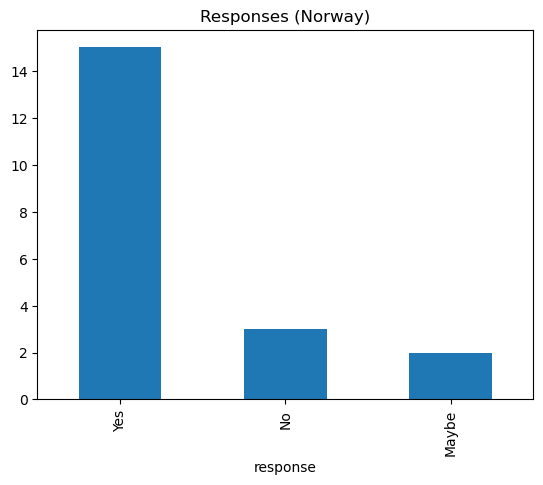

In [11]:
extract_and_analyze_results(norwegians, "Norway")


################# Analyzing results for Mexico... #################
Extraction raw result message: {'content': '{"response":"Yes","justification":"I like spicy food! I enjoy it because it adds flavor and excitement to my meals. Plus, I think it can be a fun challenge to handle the heat, and it often reminds me of traditional Mexican dishes that I love. Spicy food also tends to be associated with social gatherings, which I really enjoy."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"response":"Yes","justification":"I enjoy the complexity and depth of flavors that spices can bring to a dish. Spicy food often adds excitement to meals and can enhance the overall dining experience."}', 'refusal': None, 'role': 'assistant', 'annotations': []}
Extraction raw result message: {'content': '{"response":"Yes","justification":"I do like spicy food! I find that it adds a lot of flavor and excitement to meals, and I enjoy the warmth it bring

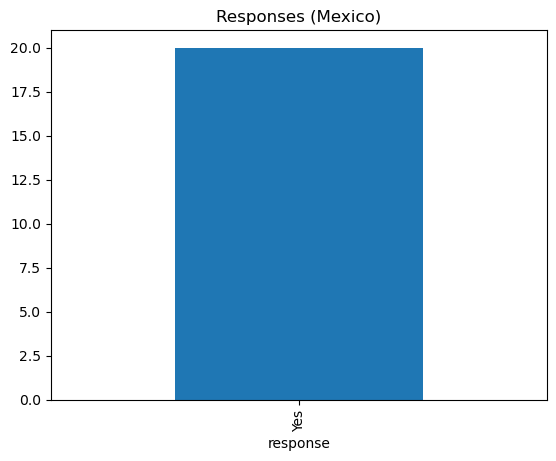

In [12]:
extract_and_analyze_results(mexicans, "Mexico")